# Census Income Project
### Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 

#### The prediction task is to determine whether a person makes over $50K a year.


### Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

# Loading the Dataset


In [3]:
df = pd.read_csv("D:/census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Shape of the dataset

The dataset appears to have a total of 32560 records and 15 columns including 1 target column

In [5]:
df.shape

(32560, 15)

In [6]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# Preporcessing

### The dataset appears to have all the information intact and has no null values.

### We have a total of 6 Int datatype and 9 Object datatype features and out target column is "Income" in this scenario

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Lets plot a heatmap to identify if any null values

#### We don't have any null / misisng values in anay columns

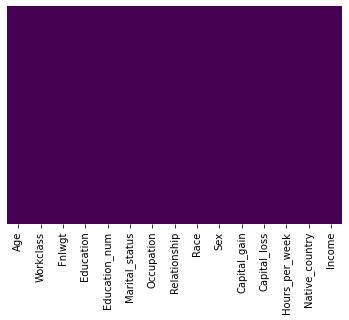

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

### Lets observe the individual unique values of the dataset

In [9]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

# Let's now observe the stats of the dataset

### All the values are accounted for and has no missing values

#### Difference between mean and std also seems fine . However for columns "Capital_gain" and "Capital_loss" its opposite. The standard deviation is more than the mean and this shows the dataset is not accurate.

#### Since its a Census data, there are high chances for human error in some way and hence data may have been misplaced or wrongly entered.

In [10]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Observe the individual columns

### We can see the columns "Workclass",  "Occupation", and "Native_country" have few records with value "?"

### Although we consider this as missing value, dataframe will not recognize as it's in object format.

### Hence I will replace the "?" value with specific number.

### If we observe below we have 1836 ? in column "Workclass",  1843 ? in column  "Occupation"  and   583 ? in column "Native_country". In this case i will proceed with replacing the "?" value with thye "mode" value


In [11]:
df["Workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [12]:
df["Occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [13]:
df["Native_country"].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

### Replace "?" with mode

In [4]:
df["Workclass"] = df["Workclass"].str.replace("?","Private")

df["Occupation"] = df["Occupation"].str.replace("?","Prof-specialty")

df["Native_country"] = df["Native_country"].str.replace("?","United-States")

In [5]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Lets plot a couple of plots for further understanding

### From the below stats we can observe that approximately 91.3% of population are from USA itself and a very minority of population belong to different countries

### Mexican are the 2nd highest as per this census and it makes sense as there is frequent border crossing between Mexico and USA, either legally or illegally

In [16]:
nativ_percent = (df["Native_country"].value_counts()/df.shape[0])*100
print(nativ_percent)

 United-States                 91.375921
 Mexico                         1.974816
 Philippines                    0.608108
 Germany                        0.420762
 Canada                         0.371622
 Puerto-Rico                    0.350123
 El-Salvador                    0.325553
 India                          0.307125
 Cuba                           0.291769
 England                        0.276413
 Jamaica                        0.248771
 South                          0.245700
 China                          0.230344
 Italy                          0.224201
 Dominican-Republic             0.214988
 Vietnam                        0.205774
 Guatemala                      0.196560
 Japan                          0.190418
 Poland                         0.184275
 Columbia                       0.181204
 Taiwan                         0.156634
 Haiti                          0.135135
 Iran                           0.132064
 Portugal                       0.113636
 Nicaragua      

### Let's observe the Age of the population.

### We can see that majority of the population lies within 31 to 47 years.

### Male population seems to be a little older than female population

### Population of Cambodian origin seem to have youngest people and in a very few cases, European countries like Ireland and Hungary seem to have population over 53 years also

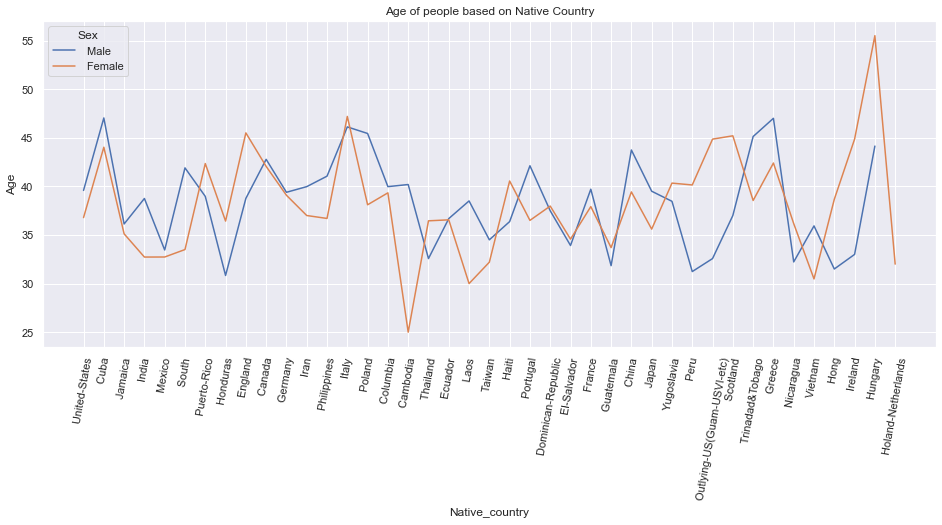

In [6]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, y="Age", x="Native_country", hue="Sex", ci=None).set(title='Age of people based on Native Country')
plt.xticks(rotation=80)
plt.show()

### Lets observe the income group as per census

### We can see majority of population i.e. approximately 75.91% of population falls under "<=50K" income group and approximately 24.08% of population fall above ">50K" income group 

### This shows majority of population is still under lower class to middle class range as <=50K a year is a standard amout in USA

In [18]:
inc_percent = (df["Income"].value_counts()/df.shape[0])*100
print(inc_percent)

 <=50K    75.918305
 >50K     24.081695
Name: Income, dtype: float64


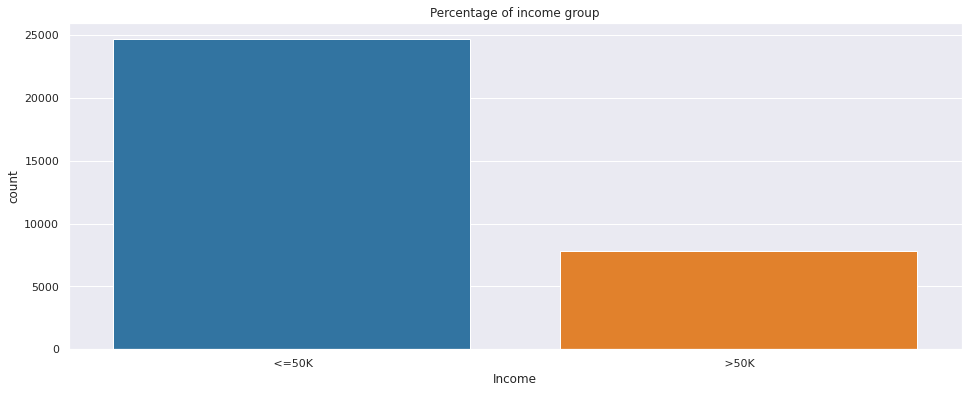

In [19]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Income", data=df, palette="tab10").set(title='Percentage of income group')

### Lets observe the count of Sex

### We can see that the count of "Male" population is almost twice higher than "Female" population, in thsi scenario.

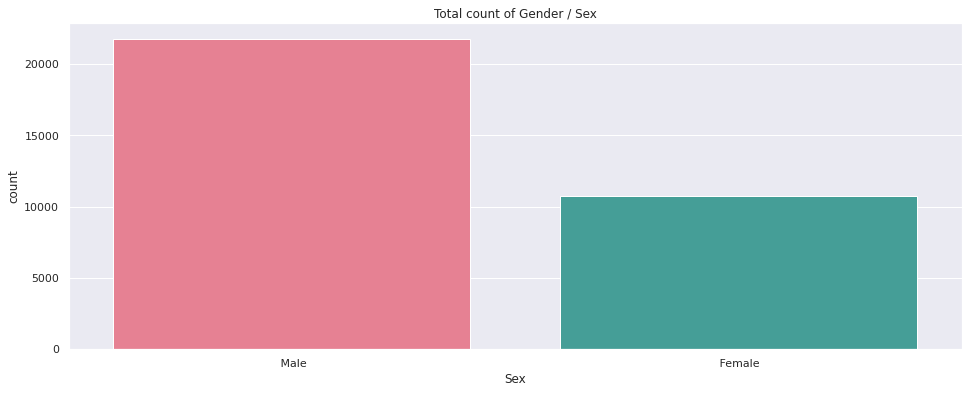

In [20]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Sex", data=df, palette="husl").set(title='Total count of Gender / Sex')

### Let's observe the Age gap between the gender

### Alhough from the previous graph we found Male ratio higher than Females, the age gap is minimal

### From the below plot although the overall Age of Male is high, there is no much difference between the ages of Male and Female in general

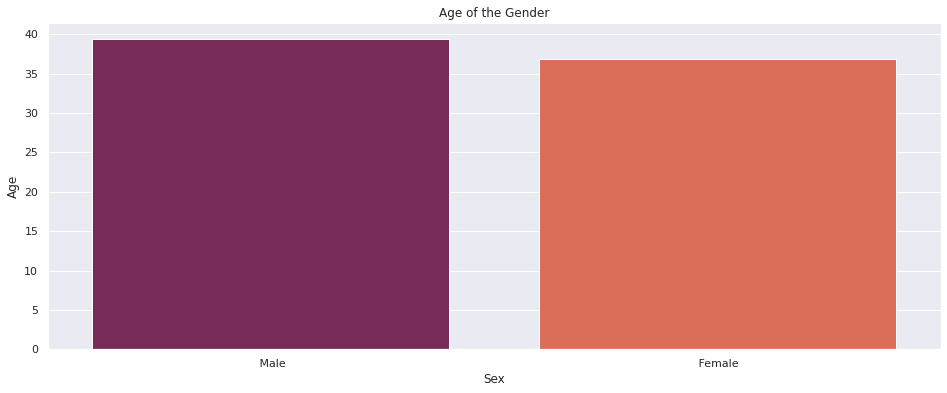

In [21]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Sex", y="Age", data=df, palette="rocket", ci=None, orient="v").set(title='Age of the Gender')

### Let's observe if there is any relationship between marital status and age

### We can see majority of the "Male" appear in married civilian spouse category

### It appears there is few few number of spouses that serve in armed forces (Married-AF-Spouse)

### We can also see most of female spouses are under "Widowed" category

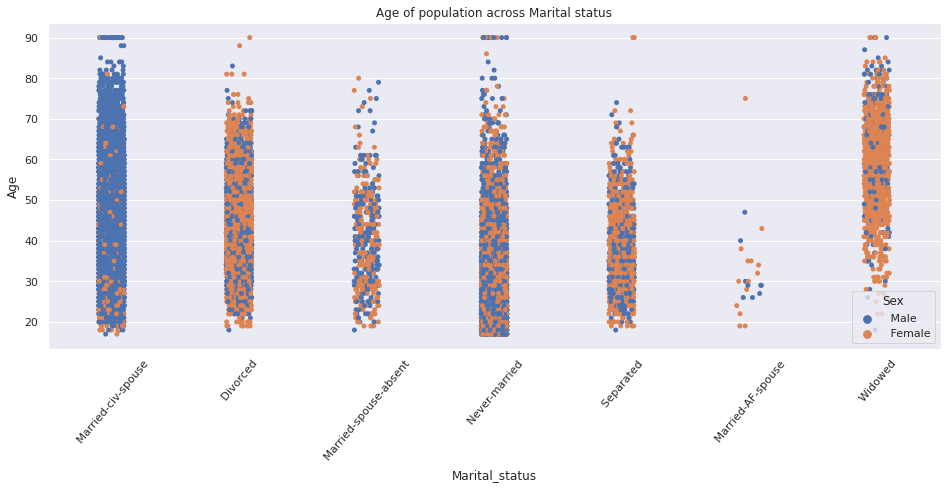

In [22]:
plt.figure(figsize=(16, 6))
ax = sns.stripplot(x="Marital_status", y="Age", data=df, hue="Sex").set(title='Age of population across Marital status')
plt.xticks(rotation=50)
plt.show()

### Let's observe if there is any relationship betwen workclass and marital status

### We can observe that population under "Never Married" are scattered amongst all the workclass category. They could also be students hence they also fall under "Never Worked". It could also be since they also fall in "without pay" work class, they remained single or "Never Married"

### We can also observe that population under "Married AF Spouse" have less number of workclasses. They either work in Federal, Local or State government sectors but the ratio seems a little high for "Private" sector.

### It's common for people in armed forces either after injury, or PTSD, or after voluntary retirement join as private contarctors and thos could be the scenario

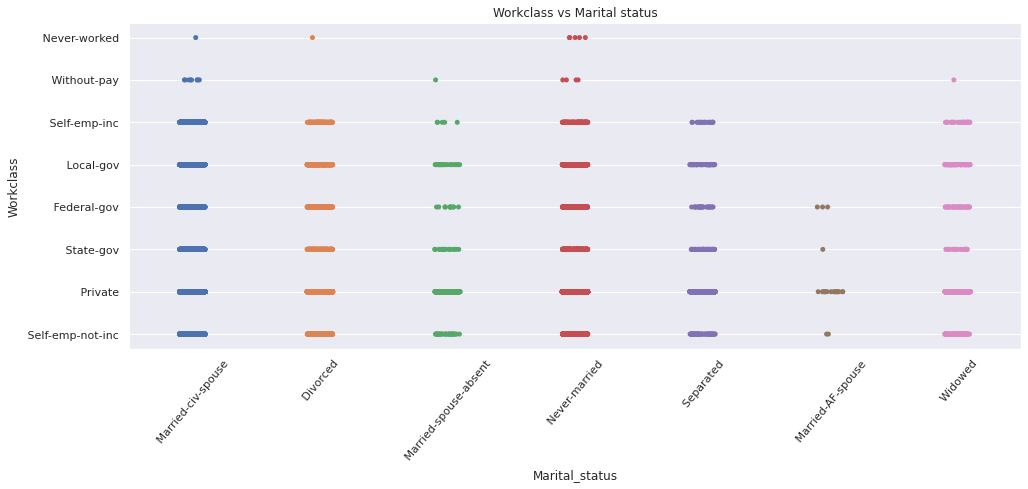

In [23]:
plt.figure(figsize=(16, 6))
ax = sns.stripplot(x="Marital_status", y="Workclass", data=df).set(title='Workclass vs Marital status')
plt.xticks(rotation=50)
plt.show()

### Lets observe the total count of workclass in general

### We can see the majority of population fall under "Private" sector jobs.

### We can also observe there is no count or very less count under "Without-Pay" and "Never-Worked". Maybe the ratio is very less compared to overall population hence the total count is negligible in this scenario

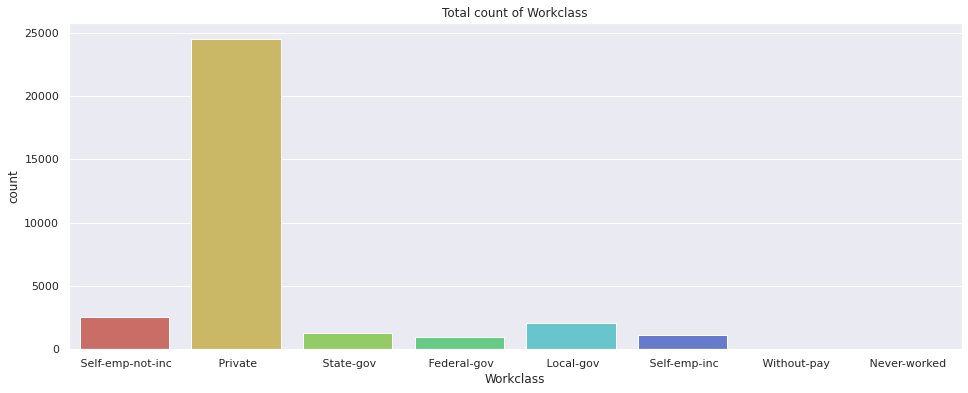

In [24]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Workclass", data=df, palette="hls").set(title='Total count of Workclass')

### Lets observe the count of educational qualification

### From the below plot we can observe that majority of population are "High school graduates" followed by population who have attended "some college" and then followed by "Bachelors"

### We can see a very minute population has pursued "Masters" and "Doctorates" and the count is very less

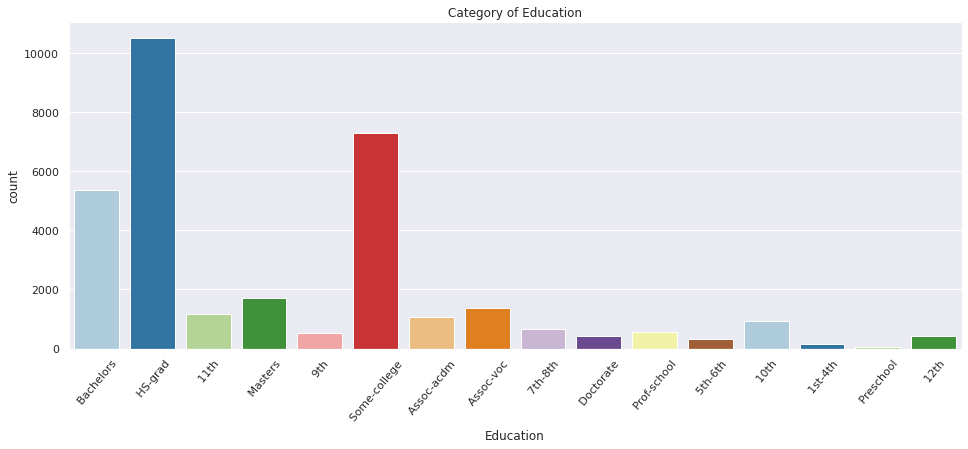

In [25]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Education", data=df, palette="Paired").set(title='Category of Education')
plt.xticks(rotation=50)
plt.show()

### Let's observe the Income spread across the Gender

### We can see that among both the gender, high population fall under "<=50K" and very less number of population fall under ">50K" category

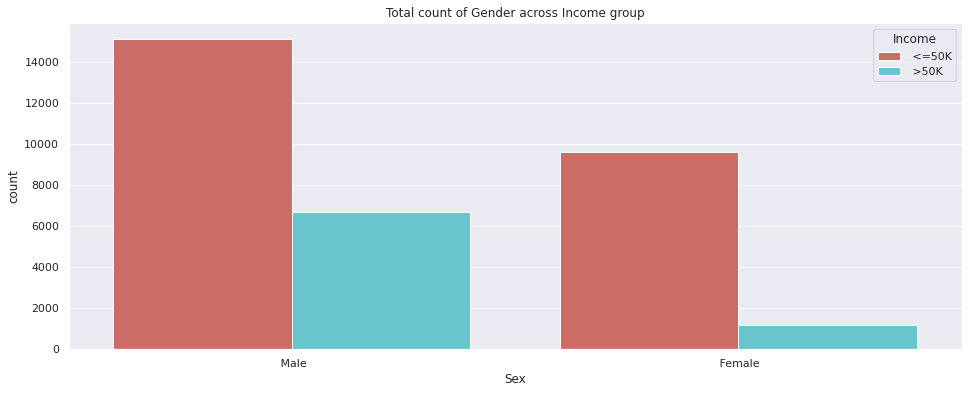

In [26]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Sex", data=df, palette="hls", hue="Income").set(title='Total count of Gender across Income group')

### Let's observe if there is any relationship between income group and educational qualification

### We can observe very few "High school grads" and "Some college" attendees get above 50 k and the remaining among those get  less than 50 k

### For a person with a "Bachelor" degree although majority of people get less than 50 , the variation between <50k and >50 k is very less.

### Only population with "Masters", "Doctorate" and "Prof-School" get higher than 50 k salary

### Hence Education highly influeces a person's salary criteria


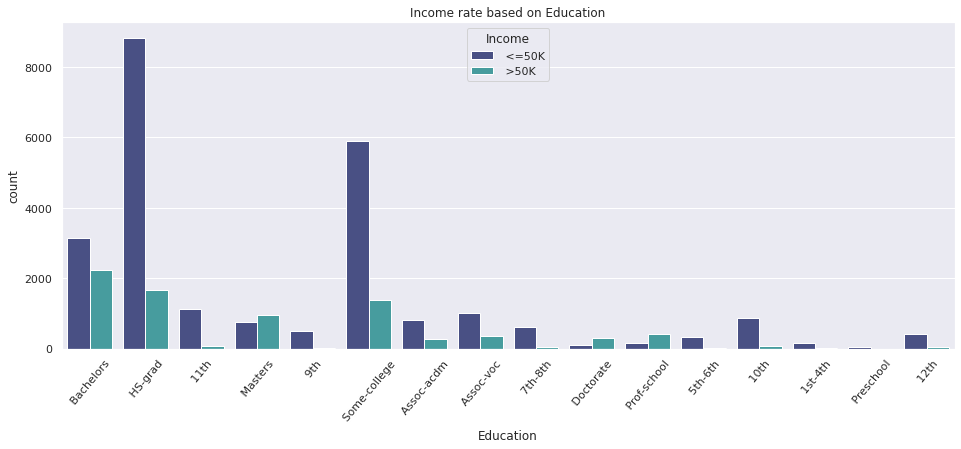

In [27]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Education", data=df, palette="mako", hue="Income").set(title='Income rate based on Education')
plt.xticks(rotation=50)
plt.show()

### Let's observe if there is any relationship between the Occupation and Income group

### We can see that "Exec-Manegerial" has less variance between both class of salary

### Although majority of professions show salary "<=50K", we can consider people working in "Exec-Manegerial" and "Porf-speciality" have higher probality of getting salary ">50K" compared to the other professions, in this scenario

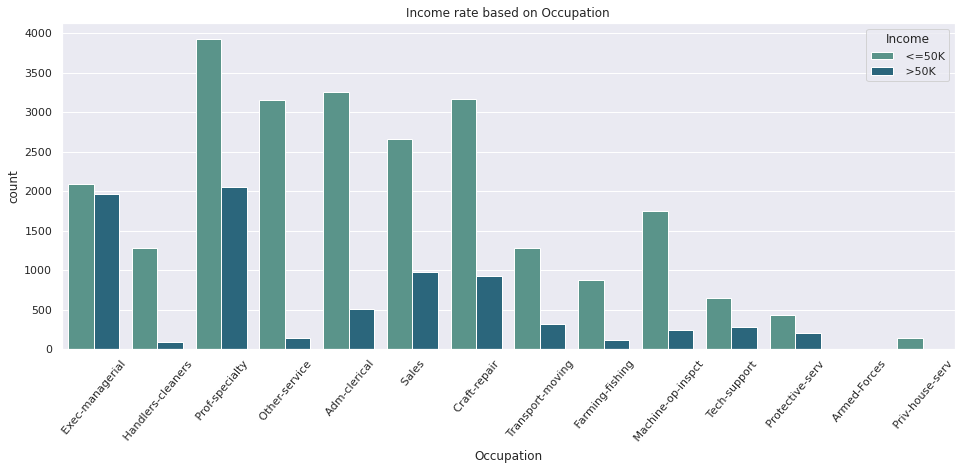

In [28]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Occupation", data=df, palette="crest", hue="Income").set(title='Income rate based on Occupation')
plt.xticks(rotation=50)
plt.show()

### Let's observe if there is any relationship between Race and Income group

### The following plot shows us "White's earn more than any other Race in general. But they also fall under "<=50K" salary group and there is high variation.

### First of all "White's" percentage appears high as majority of US population is White although it's diverse now.
### We can also observe that majority of American White's may not have higher education or don't posess shrewd skills to get jobs that pay above ">50K"

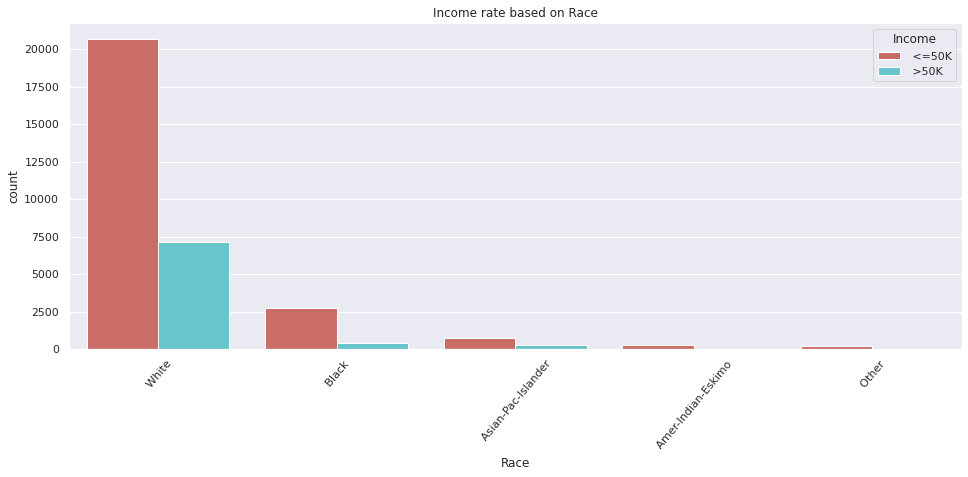

In [29]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Race", data=df, palette="hls", hue="Income").set(title='Income rate based on Race')
plt.xticks(rotation=50)
plt.show()

### From the below polt we can observe the count for "White's" is high in terms of Education and that too population falls majorly under "HS Grads", "Bachelors" and "Some College" and this seems to indirectly impact in salary ranges

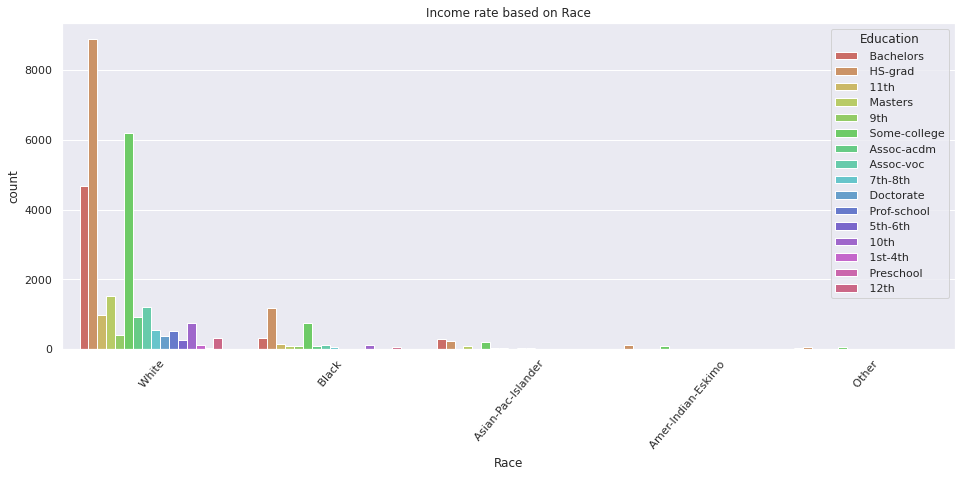

In [30]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Race", data=df, palette="hls", hue="Education").set(title='Income rate based on Race')
plt.xticks(rotation=50)
plt.show()

### Let's observe the relationship between marital status and income

### We can see "Never married" majorly fall under "<=50K" category, also since they are bachelors / spinsters the need for money is potentially less compared to a maried person.

### On the other hand "Divorced" seems to be spending more money on alimonies

### Married civillian spouses seem to have no much variation in salary category, although majority of population under this sub class also fall under "<=50K"

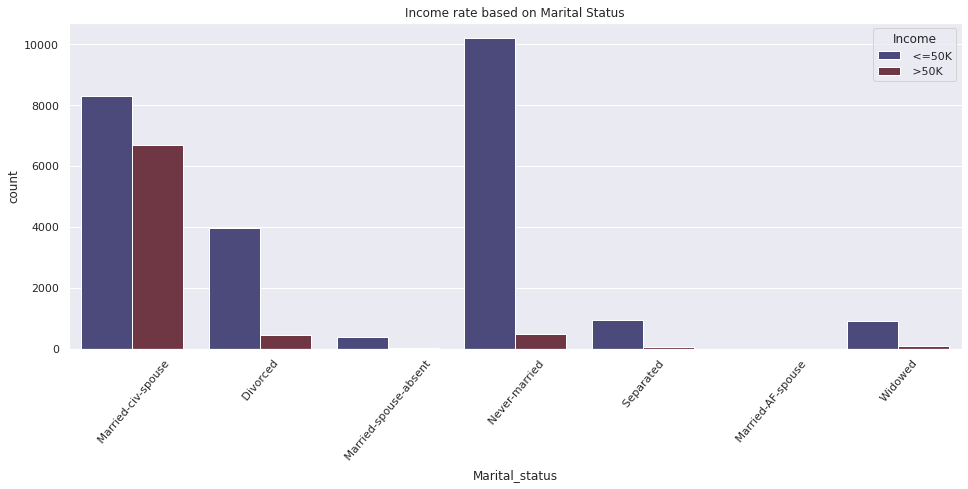

In [31]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Marital_status", data=df, palette="icefire", hue="Income").set(title='Income rate based on Marital Status')
plt.xticks(rotation=50)
plt.show()

# Encoding the dataset


##### I have used LabelEncoder as the data is categorical and is not ordinal in nature.
##### The columns 'Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country' and  'Income' would be converted as follows.

In [32]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

In [8]:
df_new1 = lab_enc.fit_transform(df["Workclass"])
df_new2 = lab_enc.fit_transform(df["Marital_status"])
df_new3 = lab_enc.fit_transform(df["Occupation"])
df_new4 = lab_enc.fit_transform(df["Relationship"])
df_new5 = lab_enc.fit_transform(df["Race"])
df_new6 = lab_enc.fit_transform(df["Sex"])
df_new7 = lab_enc.fit_transform(df["Native_country"])
df_new8 = lab_enc.fit_transform(df["Income"])

In [9]:
df["Workclass"] = df_new1
df["Marital_status"] = df_new2
df["Occupation"] = df_new3
df["Relationship"] = df_new4
df["Race"] = df_new5
df["Sex"] = df_new6
df["Native_country"] = df_new7
df["Income"] = df_new8

In [10]:
df["Education"].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

### Encoding the column "Education" using Ordincal Encoder

In [11]:
# creating the list of ordered fields to be passed for encoding

edu = [' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th',' HS-grad',' Prof-school',' Assoc-acdm',' Assoc-voc',' Some-college',' Bachelors',' Masters',' Doctorate']

In [12]:
from sklearn.preprocessing import OrdinalEncoder

In [13]:
ord_encoder = OrdinalEncoder(categories=[edu])
df_new1_ord = ord_encoder.fit_transform(df[["Education"]])

In [14]:
# overriding the existing colum with new values post encoding

df["Education"] = df_new1_ord

In [15]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,13.0,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,8.0,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,6.0,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,13.0,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,14.0,14,2,3,5,4,0,0,0,40,38,0


In [16]:
df.shape

(32560, 15)

# Distribution of all the columns in the dataset


### All the features seem to normally distributed. Since we have multiple features, lets try to identify the distribution

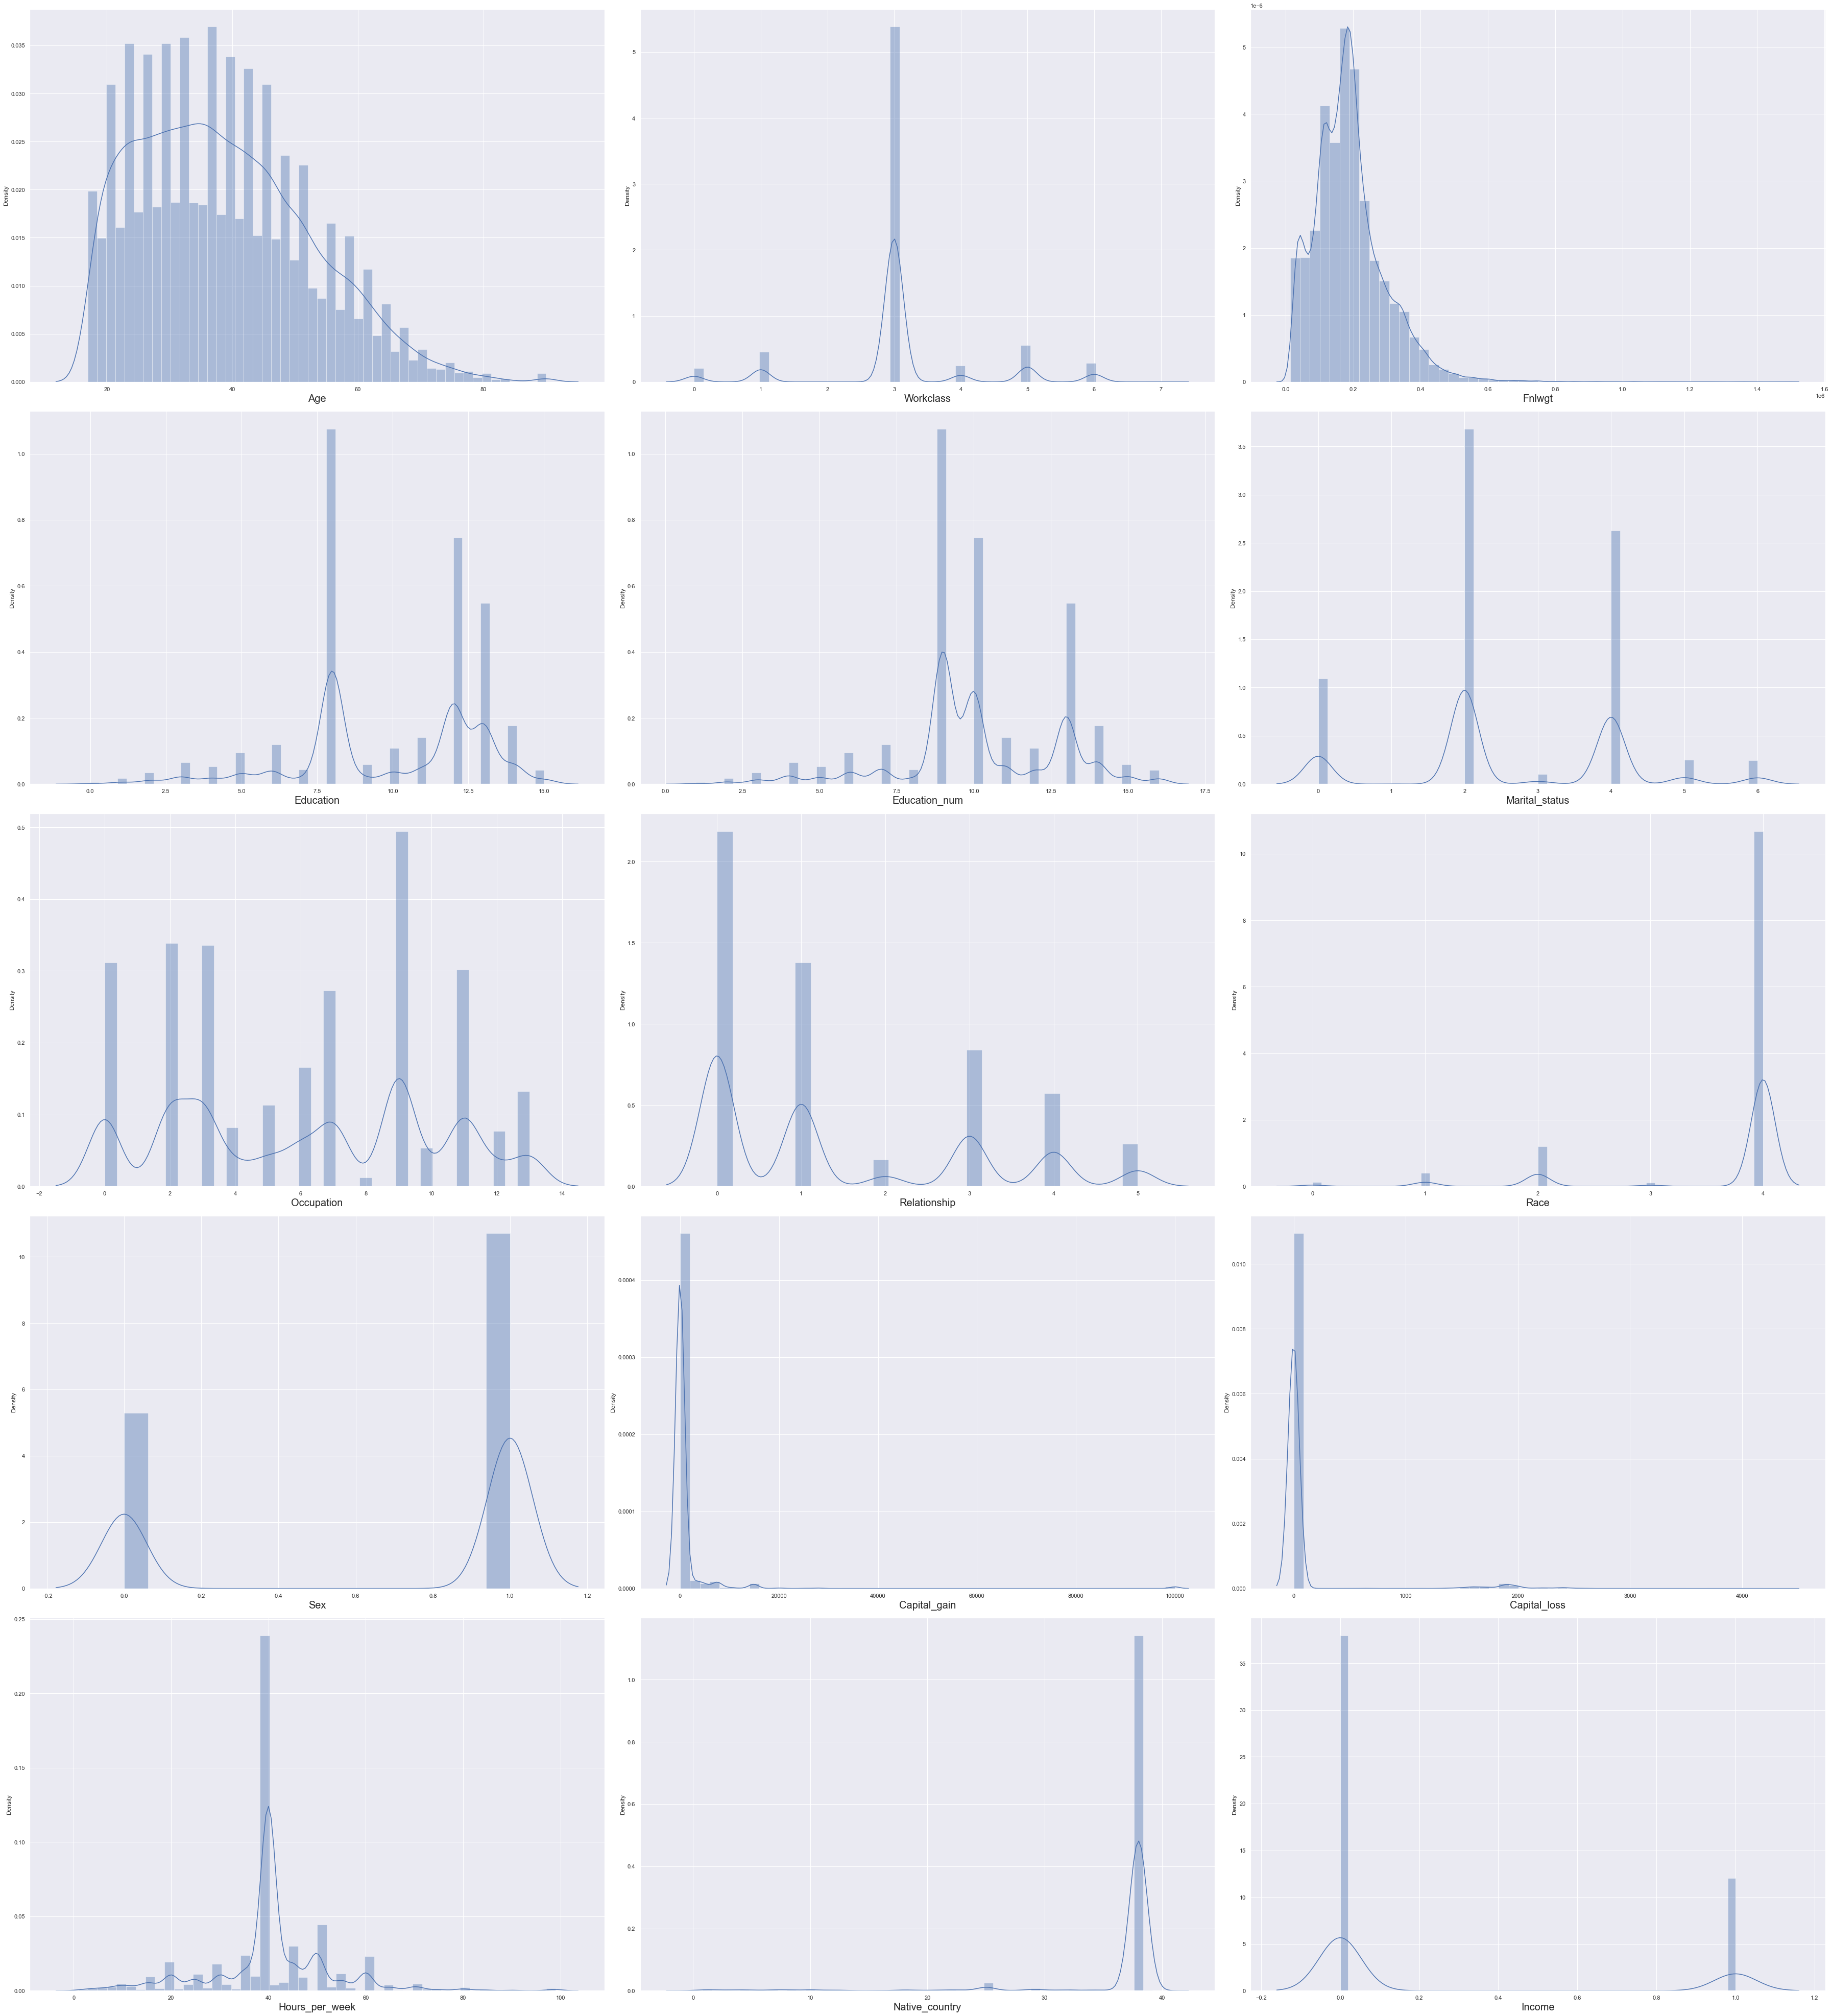

In [17]:
# let us now see the distribution of the dataset we have

plt.figure(figsize=(50,55), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=15:
        ax = plt.subplot(5,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Applying Z-score to identify and remove outliers

### Let's apply this method for continous columns 'Fnlwgt',  'Capital_gain'  and  'Capital_loss'

In [18]:
from scipy.stats import zscore

z_score = zscore(df[['Fnlwgt','Capital_gain','Capital_loss']])
abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]



# the data now seems much better than before.

df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,30540.000000,30540.000000,30540.000000,30540.000000,30540.000000,30540.000000,30540.000000,30540.000000,30540.000000,30540.000000,30540.000000,30540.000000,30540.000000,30540.000000,30540.000000
mean,38.422266,3.092371,185191.385527,9.848821,10.022233,2.624787,6.127374,1.471087,3.664571,0.662901,570.462312,1.194892,40.242141,36.412967,0.222266
std,13.682629,1.102947,94694.342915,3.006564,2.546428,1.516054,3.973720,1.607388,0.851683,0.472727,2338.278639,32.416781,12.317602,6.057237,0.415776
min,17.000000,0.000000,12285.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,27.000000,3.000000,117444.000000,8.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,177631.000000,10.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,3.000000,234658.500000,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,506329.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,22040.000000,1258.000000,99.000000,40.000000,1.000000


### Percentage of Data Loss

#### It is told that if the data loss is more than 7 to 8%, we may not get accurate results. In this case approximately 6.2% of data reduced  after applying z-score

In [19]:
# Percentage data loss:

loss_percent = (32560-30540)/32560*100
print(loss_percent)

6.203931203931204


## Distribution of all the columnspost z-score

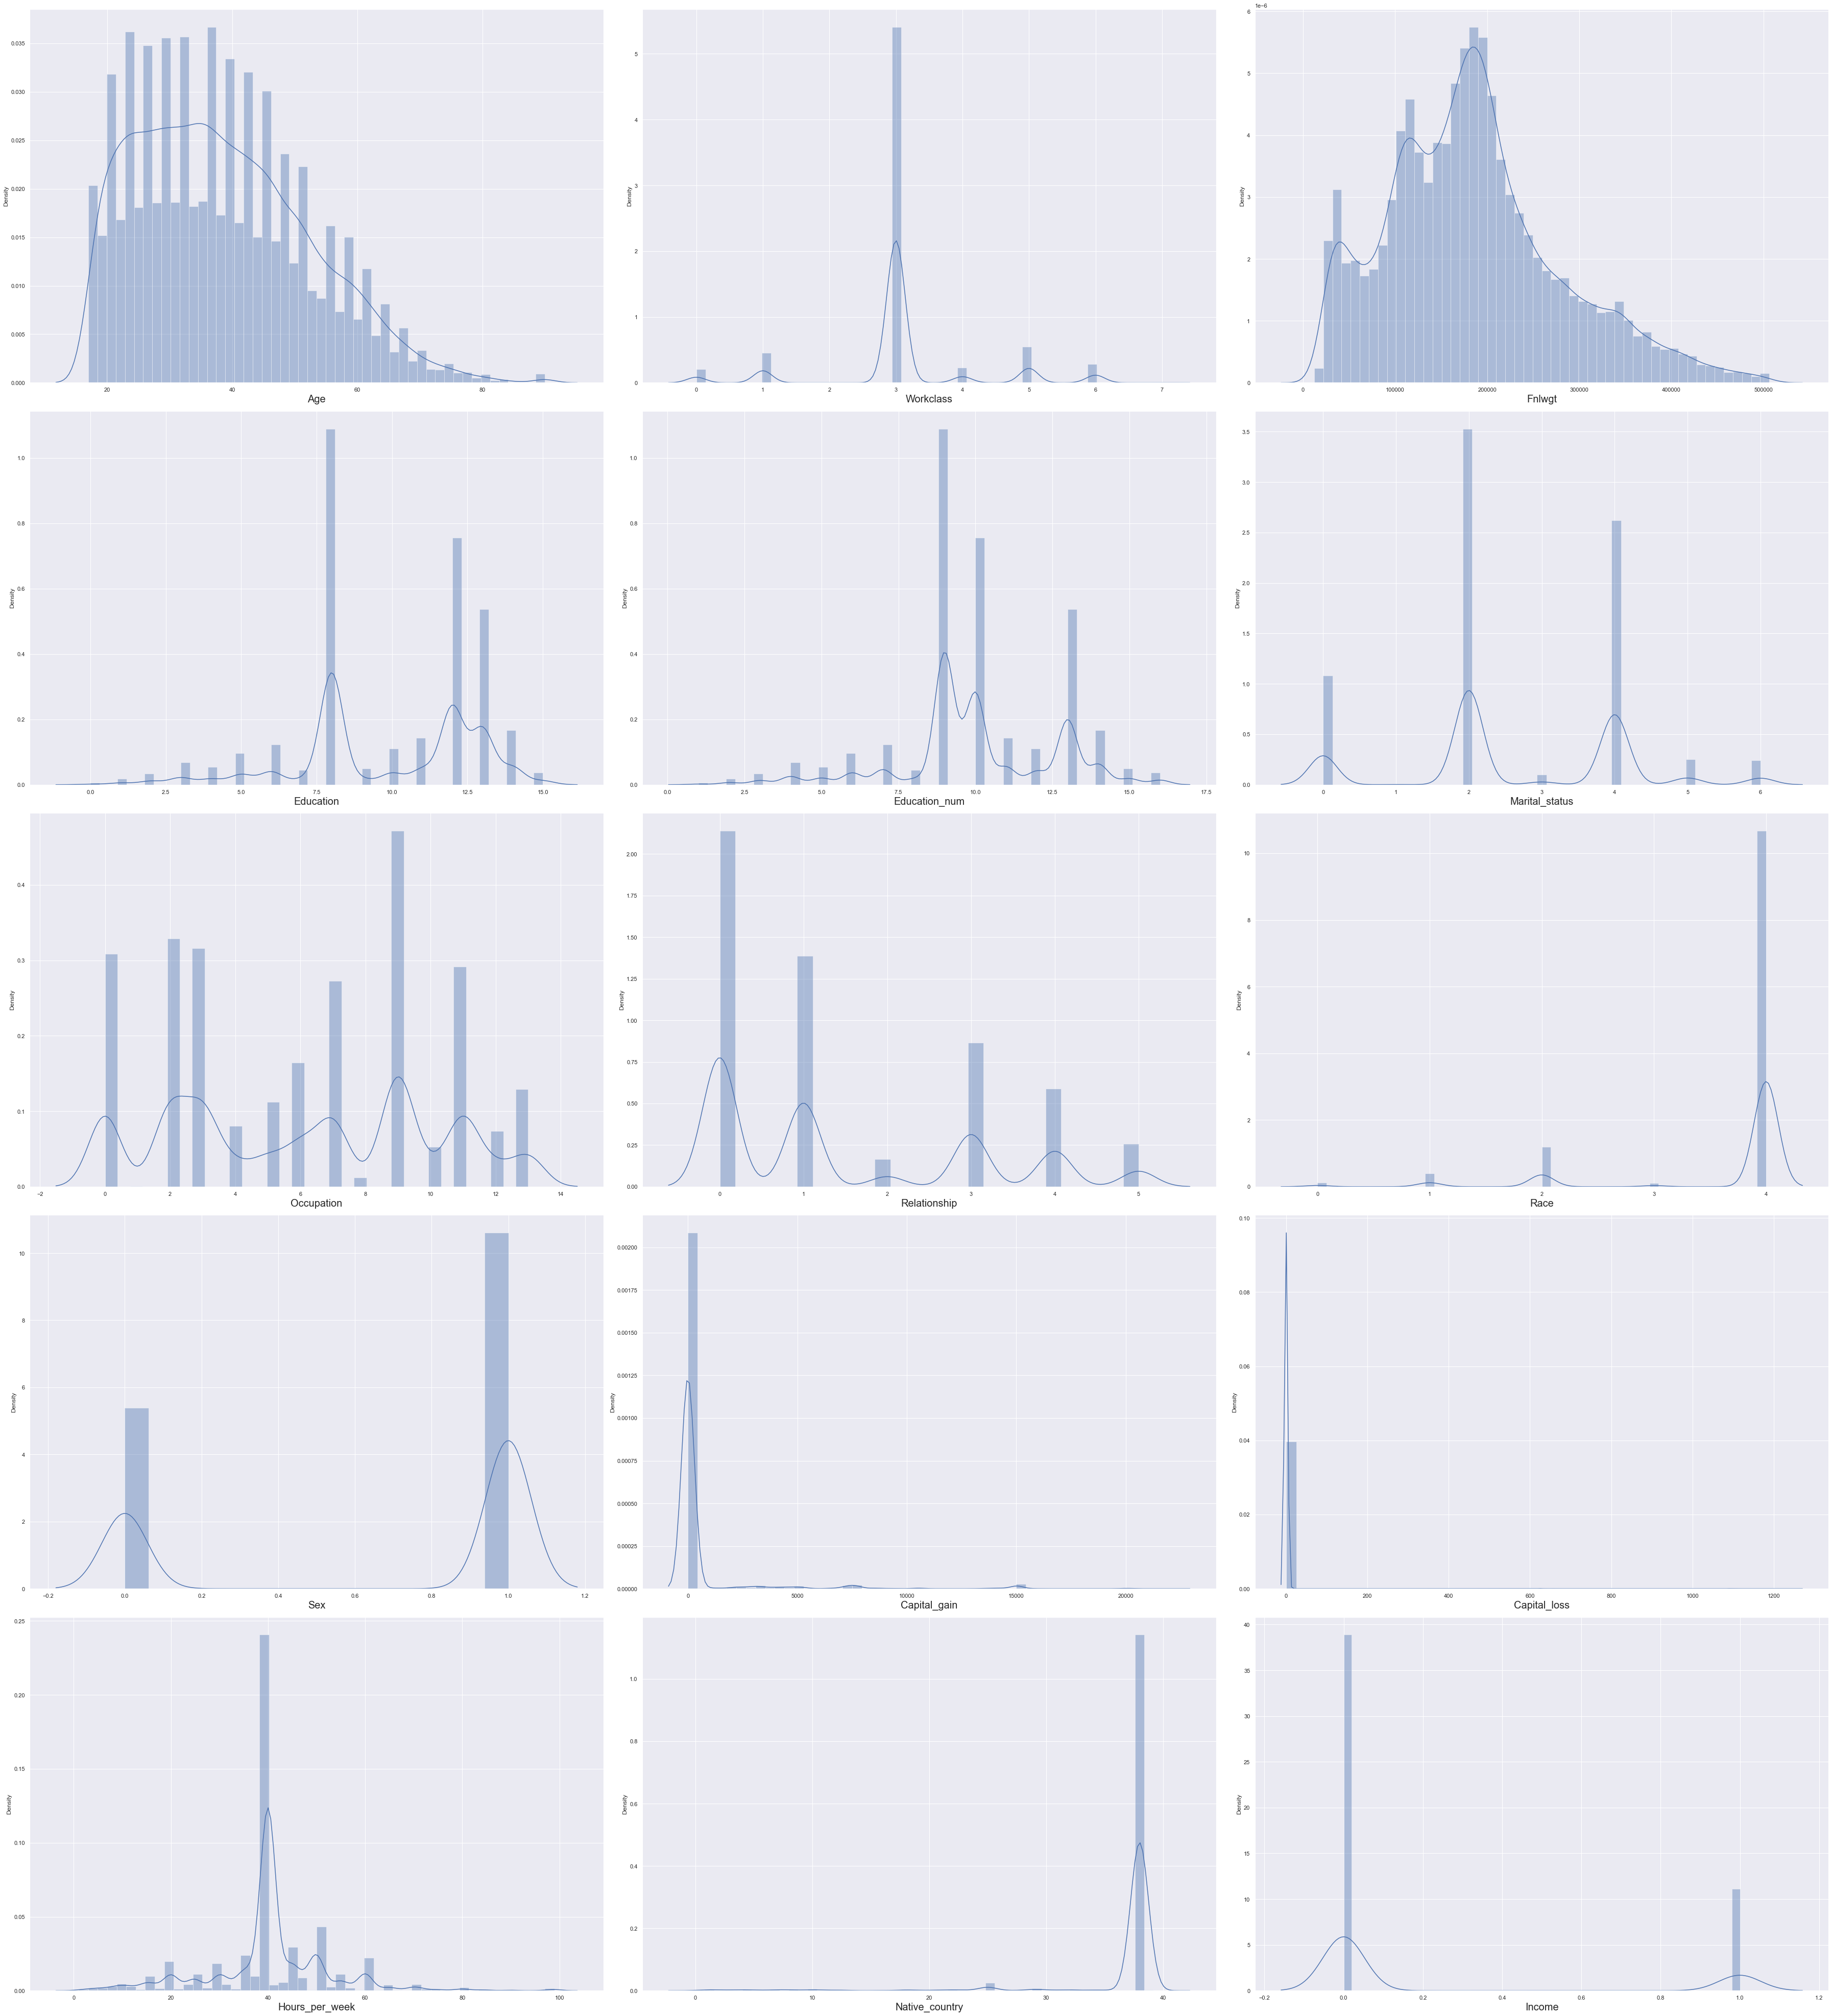

In [20]:
# let us now see the distribution of the dataset we have

plt.figure(figsize=(50,55), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=15:
        ax = plt.subplot(5,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Correlation of the features with the dependent variable "Income"

#### Almost all the colums have a high correlation with the target variable "Income"

#### Columns "Race", "Occupation", "Native_country", "Workclass", "Fnlwgt", and "Capital_loss"  have less correlation

In [47]:

corr_matrix = df.corr()
corr_matrix["Income"].sort_values(ascending=False)

Income            1.000000
Capital_gain      0.342320
Education_num     0.315532
Education         0.251319
Age               0.225228
Hours_per_week    0.217935
Sex               0.208955
Race              0.070361
Occupation        0.030490
Native_country    0.021008
Workclass        -0.007927
Fnlwgt           -0.010590
Capital_loss     -0.016533
Marital_status   -0.194861
Relationship     -0.244480
Name: Income, dtype: float64

## Lets us now examine correlation using a "heatmap" for further clarification

#### Since there are multiple features, going through this plot may seem difficult. 


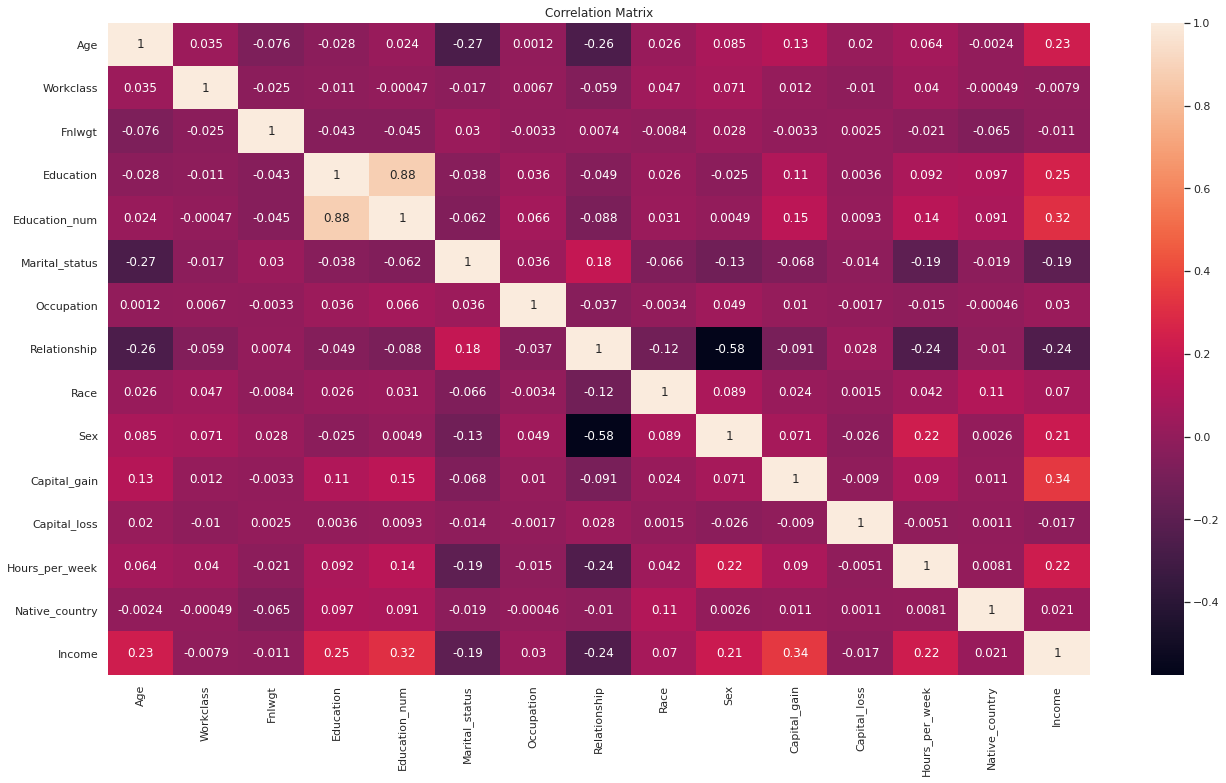

In [48]:
plt.figure(figsize=(22,12))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

# Splitting up of dataset between x (features) and y (target column)

In [21]:
x = df.drop(columns = ["Income"], axis=1)
y = df["Income"]

### Check for skewness of data

In [22]:
x.skew()

Age                0.573867
Workclass          0.091137
Fnlwgt             0.631510
Education         -0.558812
Education_num     -0.322659
Marital_status    -0.035783
Occupation         0.001357
Relationship       0.754351
Race              -2.437529
Sex               -0.689243
Capital_gain       4.957644
Capital_loss      29.839094
Hours_per_week     0.224673
Native_country    -4.233935
dtype: float64

# Lets us now Scale the data for further processing.¶

#### we have used StandardScaler for further scaling up of data 

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.84617684,  1.7296038 , -1.07590433, ..., -0.03686089,
        -2.21167949,  0.26201044],
       [-0.03086196, -0.08375036,  0.32161492, ..., -0.03686089,
        -0.01965849,  0.26201044],
       [ 1.06543655, -0.08375036,  0.5230558 , ..., -0.03686089,
        -0.01965849,  0.26201044],
       ...,
       [ 1.43086938, -0.08375036, -0.35146693, ..., -0.03686089,
        -0.01965849,  0.26201044],
       [-1.20024704, -0.08375036,  0.17212096, ..., -0.03686089,
        -1.64337775,  0.26201044],
       [ 0.99234998,  0.82292672,  1.08493595, ..., -0.03686089,
        -0.01965849,  0.26201044]])

# Finding variance inflation factor in each scaled column
### The VIF is within the acceptable range

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor( x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.174747,Age
1,1.009181,Workclass
2,1.014198,Fnlwgt
3,4.606487,Education
4,4.701868,Education_num
5,1.127058,Marital_status
6,1.012498,Occupation
7,1.666538,Relationship
8,1.031850,Race
9,1.547880,Sex


#### These columns are adding no information to thye model building

###### "Capital_gain" and "Capital_loss" - They have more number of missing values and imputing the values is not ideal.
###### Education_num - It has no specific relation to income
###### Fnlwgt - It has no specific relation to income

#### Hence these columns are dropped

In [25]:
x.drop(['Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss'], axis = 1, inplace=True)

# Check if the dataset is over sampling or under sampling

In [26]:
df["Income"].value_counts()

0    23752
1     6788
Name: Income, dtype: int64

# I will proceed with SMOTE technique for Over Sampling of dataset
### This is an imbalanced dataset and I shall proceed to balance this dataset. It was observed that the results were better for this compared to imbalanceed dataset

In [27]:
#Handling class imbalance problem ny oversampling the moinority class

from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over, y_over = SM.fit_resample(x,y)

## Balanced dataset after SMOTE

In [28]:
y_over.value_counts()

0    23752
1    23752
Name: Income, dtype: int64

# split the dataset into train and test data set

#### I have chosed 200 random state and 30% of data is divided in test dataset

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.30, random_state = 200)

# Create multi output classification models
#### I have considered 6 ML models in thsi scenario

### 1) HistGradientBoostingClassifier

In [58]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hist_reg = HistGradientBoostingClassifier()
hist_reg.fit(x_train,y_train)

y_pred = hist_reg.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8769295537468426
[[6152  958]
 [ 796 6346]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      7110
           1       0.87      0.89      0.88      7142

    accuracy                           0.88     14252
   macro avg       0.88      0.88      0.88     14252
weighted avg       0.88      0.88      0.88     14252



### 2) DecisionTreeClassifier 

In [59]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.850196463654224
[[6053 1057]
 [1078 6064]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7110
           1       0.85      0.85      0.85      7142

    accuracy                           0.85     14252
   macro avg       0.85      0.85      0.85     14252
weighted avg       0.85      0.85      0.85     14252



### 3) RandomForestClassifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.883174291327533
[[6314  796]
 [ 869 6273]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      7110
           1       0.89      0.88      0.88      7142

    accuracy                           0.88     14252
   macro avg       0.88      0.88      0.88     14252
weighted avg       0.88      0.88      0.88     14252



### 4) GradientBoostingClassifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

gb_class = GradientBoostingClassifier()
gb_class.fit(x_train,y_train)

y_pred = gb_class.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.8635279259051362
[[5882 1228]
 [ 717 6425]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      7110
           1       0.84      0.90      0.87      7142

    accuracy                           0.86     14252
   macro avg       0.87      0.86      0.86     14252
weighted avg       0.87      0.86      0.86     14252



### 5) ExtraTreesClassifier

In [62]:
from sklearn.ensemble import ExtraTreesClassifier

ex_reg = ExtraTreesClassifier()
ex_reg.fit(x_train,y_train)

y_pred = ex_reg.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8853494246421555
[[6303  807]
 [ 827 6315]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      7110
           1       0.89      0.88      0.89      7142

    accuracy                           0.89     14252
   macro avg       0.89      0.89      0.89     14252
weighted avg       0.89      0.89      0.89     14252



### 6) KNeighborsClassifier

In [63]:
from sklearn.neighbors import KNeighborsClassifier

k_neigh = KNeighborsClassifier()
k_neigh.fit(x_train,y_train)

y_pred = k_neigh.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8278838057816447
[[5236 1874]
 [ 579 6563]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      7110
           1       0.78      0.92      0.84      7142

    accuracy                           0.83     14252
   macro avg       0.84      0.83      0.83     14252
weighted avg       0.84      0.83      0.83     14252



### 7) AdaBoostClassifier

In [64]:
from sklearn.ensemble import AdaBoostClassifier

ad_boost = AdaBoostClassifier()
ad_boost.fit(x_train,y_train)

y_pred = ad_boost.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8522312657872579
[[5768 1342]
 [ 764 6378]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.85      7110
           1       0.83      0.89      0.86      7142

    accuracy                           0.85     14252
   macro avg       0.85      0.85      0.85     14252
weighted avg       0.85      0.85      0.85     14252



# Cross validation to check if its overfitting

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
scr = cross_val_score(hist_reg, x, y, cv=3)
print("Cross Validation score of HistGradientBoostingClassifier model is:", scr.mean())

Cross Validation score of HistGradientBoostingClassifier model is: 0.8456777996070727


In [67]:
scr = cross_val_score(dt, x, y, cv=3)
print("Cross Validation score of DecisionTreeClassifier model is:", scr.mean())

Cross Validation score of DecisionTreeClassifier model is: 0.7867714472822528


In [68]:
scr = cross_val_score(rf, x, y, cv=3)
print("Cross Validation score of RandomForestClassifier model is:", scr.mean())

Cross Validation score of RandomForestClassifier model is: 0.8249181401440734


In [69]:
scr = cross_val_score(gb_class, x, y, cv=3)
print("Cross Validation score of GradientBoostingClassifier model is:", scr.mean())

Cross Validation score of GradientBoostingClassifier model is: 0.8430255402750492


In [70]:
scr = cross_val_score(ex_reg, x, y, cv=3)
print("Cross Validation score of ExtraTreesClassifier model is:", scr.mean())

Cross Validation score of ExtraTreesClassifier model is: 0.8178454485920105


In [71]:
scr = cross_val_score(k_neigh, x, y, cv=3)
print("Cross Validation score of KNeighborsClassifier model is:", scr.mean())


Cross Validation score of KNeighborsClassifier model is: 0.8020628683693517


In [72]:
scr = cross_val_score(ad_boost, x, y, cv=3)
print("Cross Validation score of AdaBoostClassifier model is:", scr.mean())


Cross Validation score of AdaBoostClassifier model is: 0.8407334643091028


# Selecting the best ML model for this dataset

### From the above algorithms AdaBoostClassifier has the lowest difference between the accuracy score and cross validation.

### The remaining alogorithms also seem to be producing good results but AdaBoostClassifier is suitable for this type of dataset, in this scenario


| SrNo | Models used | Model Accuracy | Cross Validation | Difference output |
| --- | --- | --- | --- |---|
| 1 | HistGradientBoostingClassifier | 0.876929553746842 | 0.845677799607072 | 0.03125175413977 |
| 2 | DecisionTreeClassifier | 0.850196463654224 | 0.786771447282252 | 0.063425016371972 |
| 3 | RandomForestClassifier | 0.883174291327533 | 0.824918140144073 | 0.0582561511834599 |
| 4 | GradientBoostingClassifier | 0.863527925905136 | 0.843025540275049 | 0.0205023856300871 |
| 5 | ExtraTreesClassifier | 0.885349424642155 | 0.81784544859201 | 0.067503976050145 |
| 6 | KNeighborsClassifier | 0.827883805781644 | 0.802062868369351 | 0.025820937412293 |
| 7 | AdaBoostClassifier | 0.852231265787257 | 0.840733464309102 | 0.011497801478155 |





# ROC AUC score for all the algorithms

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [74]:
#ROC AUC score for HistGradientBoostingClassifier

roc_auc_score(y_test, hist_reg.predict(x_test))

0.8769034112504188

In [75]:
#ROC AUC score for DecisionTreeClassifier

roc_auc_score(y_test, dt.predict(x_test))

0.8501990168496733

In [76]:
#ROC AUC score for RandomForestClassifier

roc_auc_score(y_test, rf.predict(x_test))

0.8831852030401172

In [77]:
#ROC AUC score for GradientBoostingClassifier

roc_auc_score(y_test, gb_class.predict(x_test))

0.8634467331579087

In [78]:
#ROC AUC score for ExtraTreesClassifier

roc_auc_score(y_test, ex_reg.predict(x_test))

0.8853519975139632

In [79]:
#ROC AUC score for KNeighborsClassifier

roc_auc_score(y_test, k_neigh.predict(x_test))

0.8276789192199548

In [80]:
#ROC AUC score for AdaBoostClassifier

roc_auc_score(y_test, ad_boost.predict(x_test))

0.8521394606733962

# ROC AUC score plots

#### We can see the ROC curve shows more for HistGradientBoostingClassifier in the plot

#### But we will get its checked by referring to the difference of model accuracy and cross validation score

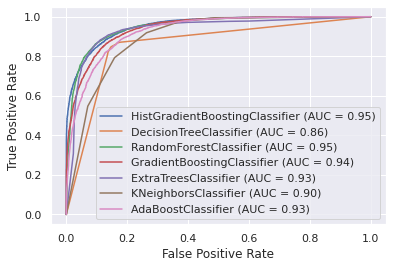

In [81]:
disp = plot_roc_curve(hist_reg, x_test, y_test)

plot_roc_curve(dt, x_test, y_test, ax=disp.ax_)

plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)

plot_roc_curve(gb_class, x_test, y_test, ax=disp.ax_)

plot_roc_curve(ex_reg, x_test, y_test, ax=disp.ax_)

plot_roc_curve(k_neigh, x_test, y_test, ax=disp.ax_)

plot_roc_curve(ad_boost, x_test, y_test, ax=disp.ax_)


plt.legend(prop={"size":11}, loc="lower right")

plt.show()

# Hyper Parameter Tuning

### Let us try to tune the proposed model (AdaBoostClassifier) to get better accuracy, if possible

##### The "paramaters" have been selected from the skicit library and I have considered 4 paramaters with multiple values

In [82]:
parameters = {"algorithm":["SAMME", "SAMME.R"],
              "n_estimators":[10, 20, 30, 40, 50, 60],
              "learning_rate":[1, 2, 3, 4, 5, 6],
              "random_state":[50, 100, 150, 200, 250, 300]
              }

### GridSearchCV is used to tune the parameters by fitting the same to the training dataset

### I got quicker results when using CV value 3

In [83]:
from sklearn.model_selection import GridSearchCV
GCV = GridSearchCV(AdaBoostClassifier(), parameters, cv=3)

In [84]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [10, 20, 30, 40, 50, 60],
                         'random_state': [50, 100, 150, 200, 250, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [91]:
GCV.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 1,
 'n_estimators': 60,
 'random_state': 50}

### Rebuild the model using the appropriate params we recieved from best_params_


#### Its observed that the model accuracy was approximately 85.22 % earlier and post Hyper Parameter tuning its now approximately 85.32 % better 

In [92]:
mod_ada_class = AdaBoostClassifier(algorithm= "SAMME.R", learning_rate= 1, n_estimators= 60, random_state= 50)

mod_ada_class.fit(x_train,y_train)
pred = mod_ada_class.predict(x_test)
print(accuracy_score(y_test,pred)*100)

85.32135840583777


# Saving the model (using joblib)

In [93]:
# Saving the model

import joblib
joblib.dump(mod_ada_class,"Census_Income_US.pkl")

['Census_Income_US.pkl']

# Loading the saved model

In [94]:
model = joblib.load("Census_Income_US.pkl")

In [95]:
prediction = model.predict(x_test)

In [96]:
prediction=pd.DataFrame(prediction)
prediction

,0
0,0
1,1
2,1
3,1
4,0
...,...
14247,1
14248,1
14249,1
14250,1
